__Note__
*__The outliers are not treated before making of this model.__

# Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [5]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

# Importing the Data set

In [8]:
df = pd.read_csv("ToyotaCorolla.csv", encoding= 'unicode_escape',usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])

# EDA

In [9]:
df.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
df.shape

(1436, 9)

__1436 no. of rows and 9 no. of columns.__

In [11]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [12]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

__There is No missing values in our Dataset.__

In [13]:
df.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [15]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

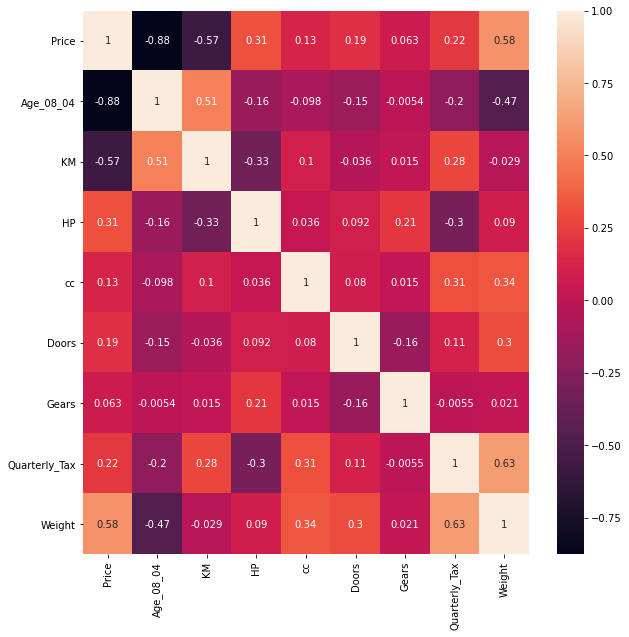

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Figure size 720x720 with 0 Axes>

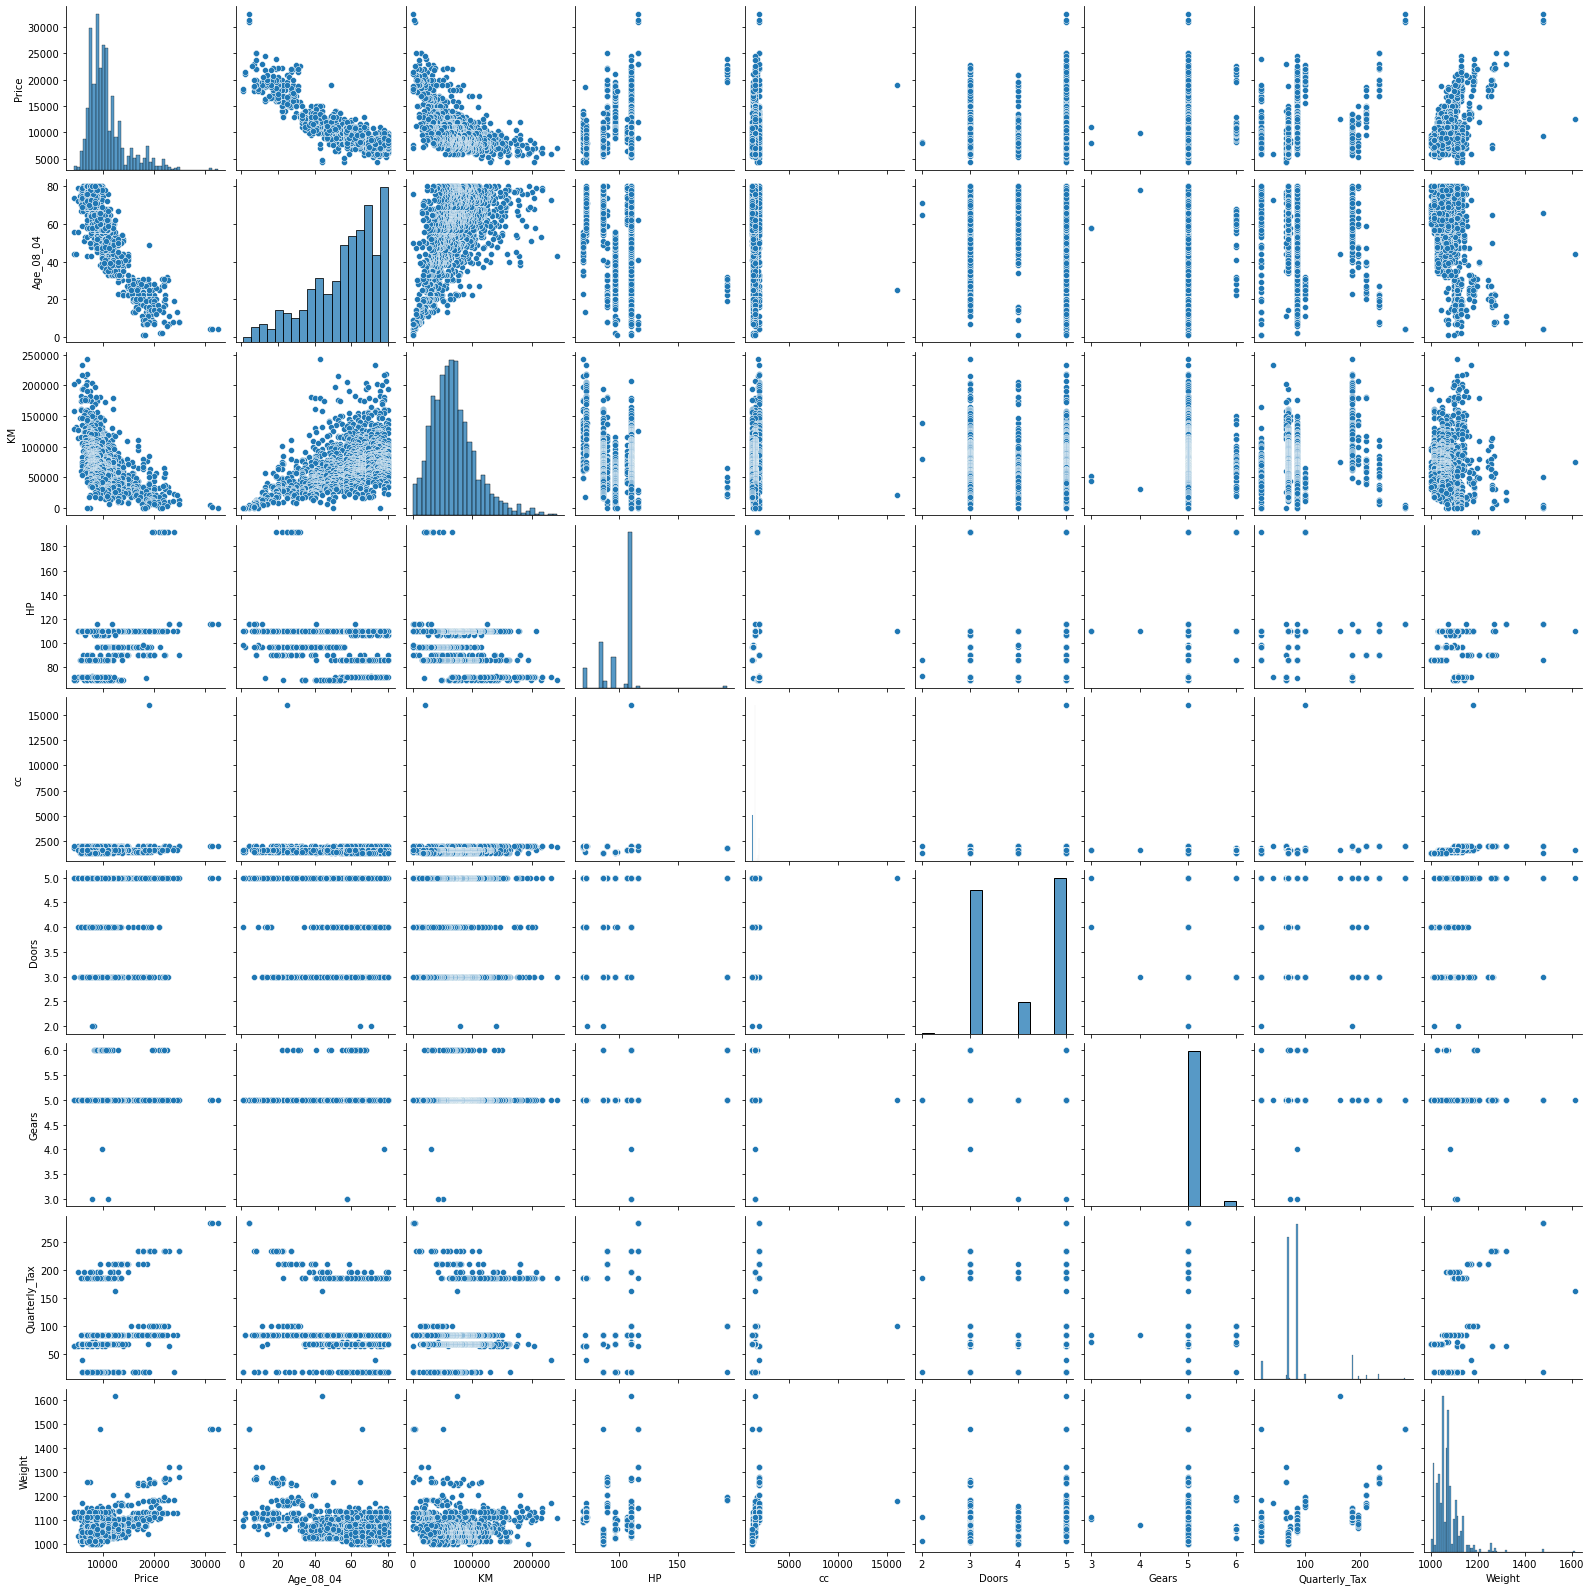

In [18]:
plt.figure(figsize=(10,10))
sns.pairplot(df)

In [19]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [25]:
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [26]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        22:44:10   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear regression 
**We will check the regression of CC & Doors saperately with price data**

In [29]:
model_cd=smf.ols("Price~cc+Doors",data=df).fit() ##Doesn't see any changes with using both together

In [30]:
model_cd.pvalues

Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64

In [31]:
model_D=smf.ols("Price~Doors",data=df).fit()

In [32]:
model_D.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [33]:
model_c=smf.ols("Price~cc",data=df).fit()

In [34]:
model_c.pvalues 

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

# Standardization

### Dropping Doors and CC due to high p-values.

In [55]:
df1=df.drop(labels=['Doors','cc'],axis=1)

In [56]:
df1

,Price,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,5,210,1165
1,13750,23,72937,90,5,210,1165
2,13950,24,41711,90,5,210,1165
3,14950,26,48000,90,5,210,1165
4,13750,30,38500,90,5,210,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,5,69,1025
1432,10845,72,19000,86,5,69,1015
1433,8500,71,17016,86,5,69,1015
1434,7250,70,16916,86,5,69,1015


In [57]:
X=df1.iloc[:,1:]

In [58]:
y=df.Price

In [59]:
ss=StandardScaler()
X_s=ss.fit_transform(X)
X_s = pd.DataFrame(ss.fit_transform(X),columns = X.columns[:])
X_s.head()

,Age_08_04,KM,HP,Gears,Quarterly_Tax,Weight
0,-1.771966,-0.574695,-0.768042,-0.140425,2.98868,1.758561
1,-1.771966,0.117454,-0.768042,-0.140425,2.98868,1.758561
2,-1.718184,-0.715386,-0.768042,-0.140425,2.98868,1.758561
3,-1.610620,-0.547650,-0.768042,-0.140425,2.98868,1.758561
4,-1.395491,-0.801028,-0.768042,-0.140425,2.98868,1.853577


In [60]:
# 20% data as validation set
x_strain,x_svalid,y_strain,y_svalid = train_test_split(X_s,y,test_size=0.2,random_state=22)

In [61]:
lr2=LinearRegression()
lr2.fit(x_strain,y_strain)

LinearRegression()

In [62]:
y1_spred=lr2.predict(x_svalid)

In [63]:
from math import sqrt
MSE= metrics.mean_squared_error(y_svalid,y1_spred)

rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1467.5042792998177
